<a href="https://colab.research.google.com/github/afrin764/aav_Supervised_and_semi_supervised/blob/main/sl_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total images: 683
Classes: ['Double' 'Empty' 'Single']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]


Extracting features using RESNET...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step

Training SVM with RESNET features...
 SVM Accuracy: 86.13% | Precision: 0.86 | Recall: 0.85 | F1: 0.86
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/RESNET_SVM_confusion_matrix.png


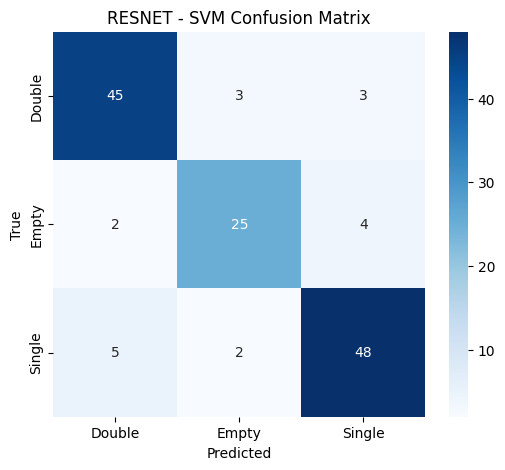


Confusion Matrix:
 [[45  3  3]
 [ 2 25  4]
 [ 5  2 48]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.87      0.88      0.87        51
       Empty       0.83      0.81      0.82        31
      Single       0.87      0.87      0.87        55

    accuracy                           0.86       137
   macro avg       0.86      0.85      0.86       137
weighted avg       0.86      0.86      0.86       137


Training MLP with RESNET features...
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3707 - loss: 1.6323 - val_accuracy: 0.6715 - val_loss: 0.7258
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5227 - loss: 1.0695 - val_accuracy: 0.6861 - val_loss: 0.6907
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6409 - loss: 0.8046 - val_accuracy: 0.7445 - val_loss: 0.5998
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6839 - loss: 0.7269 - val_accuracy: 0.7518 - val_loss

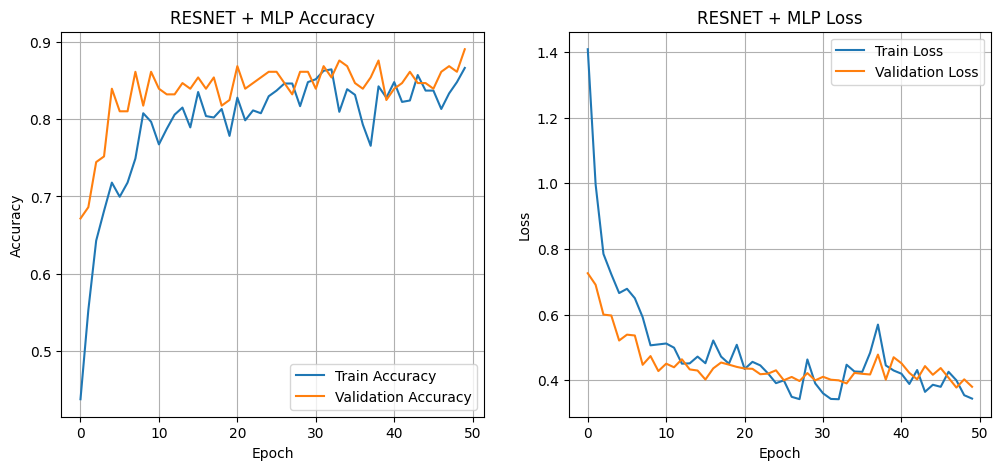

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
 MLP Accuracy: 89.05% | Precision: 0.89 | Recall: 0.89 | F1: 0.89
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/RESNET_MLP_confusion_matrix.png


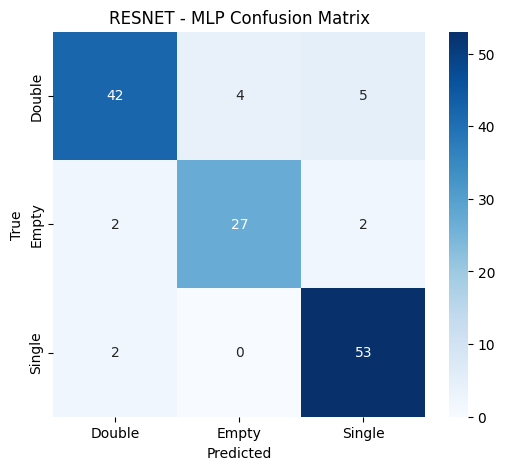


Confusion Matrix:
 [[42  4  5]
 [ 2 27  2]
 [ 2  0 53]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.91      0.82      0.87        51
       Empty       0.87      0.87      0.87        31
      Single       0.88      0.96      0.92        55

    accuracy                           0.89       137
   macro avg       0.89      0.89      0.89       137
weighted avg       0.89      0.89      0.89       137


Training RandomForest with RESNET features...
 RandomForest Accuracy: 86.13% | Precision: 0.87 | Recall: 0.84 | F1: 0.85
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/RESNET_RandomForest_confusion_matrix.png


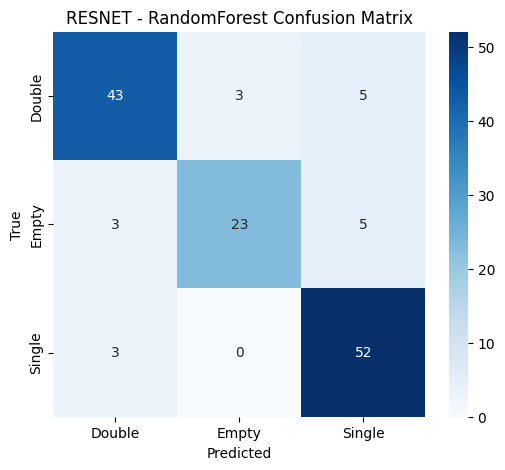


Confusion Matrix:
 [[43  3  5]
 [ 3 23  5]
 [ 3  0 52]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.88      0.84      0.86        51
       Empty       0.88      0.74      0.81        31
      Single       0.84      0.95      0.89        55

    accuracy                           0.86       137
   macro avg       0.87      0.84      0.85       137
weighted avg       0.86      0.86      0.86       137


 Metrics Summary:

    Model    Classifier  Accuracy  Precision    Recall  F1-Score
0  RESNET           SVM  0.861314   0.857148  0.853844  0.855395
1  RESNET           MLP  0.890511   0.889115  0.886045  0.886229
2  RESNET  RandomForest  0.861314   0.866959  0.843509  0.851969

 Metrics summary CSV saved to /content/drive/MyDrive/confusion_matrices/RESNET_metrics_summary.csv


In [ ]:
# Install dependencies
!pip install transformers tensorflow scikit-learn opencv-python matplotlib seaborn --quiet

# Imports
from transformers import ViTFeatureExtractor, ViTModel
import torch
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV3Large
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset Path
dataset_path = '/content/drive/MyDrive/IDTAvv/100_4s_train_val_photos'

# Load Dataset
img_size = (224, 224)
X, y = [], []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            label = os.path.basename(root)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("Total images:", len(X))
print("Classes:", np.unique(y))

# Encode Labels and Split
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convert labels to categorical for Keras
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Load ViT Feature Extractor
vit_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# Feature extraction functions
def extract_vit_features(X_data):
    inputs = vit_feature_extractor(images=[cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in X_data], return_tensors="pt")
    with torch.no_grad():
        outputs = vit_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()

def extract_features(model_name, X_data):
    if model_name == 'resnet':
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        X_data = resnet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vgg16':
        base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
        X_data = vgg_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'mobilenet':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, pooling='avg')
        X_data = mobilenet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vit':
        features = extract_vit_features(X_data)
    else:
        raise ValueError("Invalid model name")
    return features

# Create Keras MLP model
def create_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Folder to save confusion matrices
save_folder = '/content/drive/MyDrive/confusion_matrices'
os.makedirs(save_folder, exist_ok=True)

# Choose model: 'resnet', 'vgg16', 'mobilenet', 'vit'
model_choice = 'resnet'

print(f"\nExtracting features using {model_choice.upper()}...")
train_features = extract_features(model_choice, X_train)
val_features = extract_features(model_choice, X_val)

# Classifiers
classifiers = {
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store metrics
metrics_list = []

# Loop over classifiers
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name} with {model_choice.upper()} features...")

    if clf_name == "MLP":
        keras_mlp = create_mlp(train_features.shape[1], len(label_encoder.classes_))
        history = keras_mlp.fit(train_features, y_train_cat, epochs=50, batch_size=32,
                                validation_data=(val_features, y_val_cat), verbose=1)

        # Plot training history
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_choice.upper()} + MLP Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_choice.upper()} + MLP Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.show()

        y_pred_probs = keras_mlp.predict(val_features)
        y_pred = np.argmax(y_pred_probs, axis=1)
    else:
        clf.fit(train_features, y_train)
        y_pred = clf.predict(val_features)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)

    print(f" {clf_name} Accuracy: {acc*100:.2f}% | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

    metrics_list.append({
        'Model': model_choice.upper(),
        'Classifier': clf_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_choice.upper()} - {clf_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    cm_filename = f'{model_choice.upper()}_{clf_name}_confusion_matrix.png'
    cm_path = os.path.join(save_folder, cm_filename)
    plt.savefig(cm_path, bbox_inches='tight')
    print(f" Confusion matrix saved to {cm_path}")
    plt.show()

    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Metrics summary
metrics_df = pd.DataFrame(metrics_list)
print("\n Metrics Summary:\n")
print(metrics_df)

# Save metrics summary
metrics_csv_path = os.path.join(save_folder, f'{model_choice.upper()}_metrics_summary.csv')
metrics_df.to_csv(metrics_csv_path, index=False)
print(f"\n Metrics summary CSV saved to {metrics_csv_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total images: 683
Classes: ['Double' 'Empty' 'Single']


/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(



Extracting features using MOBILENET...


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 652ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

Training SVM with MOBILENET features...
 SVM Accuracy: 89.05% | Precision: 0.90 | Recall: 0.87 | F1: 0.88
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/MOBILENET_SVM_confusion_matrix.png


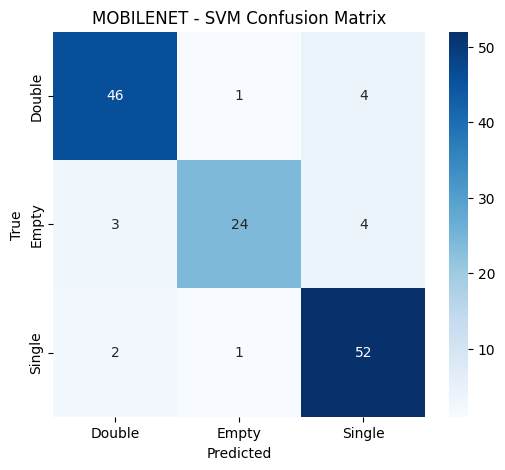


Confusion Matrix:
 [[46  1  4]
 [ 3 24  4]
 [ 2  1 52]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.90      0.90      0.90        51
       Empty       0.92      0.77      0.84        31
      Single       0.87      0.95      0.90        55

    accuracy                           0.89       137
   macro avg       0.90      0.87      0.88       137
weighted avg       0.89      0.89      0.89       137


Training MLP with MOBILENET features...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4081 - loss: 1.6477 - val_accuracy: 0.5109 - val_loss: 0.8890
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5117 - loss: 1.0098 - val_accuracy: 0.7372 - val_loss: 0.7127
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6113 - loss: 0.8765 - val_accuracy: 0.8321 - val_loss: 0.5505
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7259 - loss: 0.6820 - val_accuracy: 0.8248 - val_loss: 0.5022
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 0.6770 - val_accuracy: 0.7883 - val_loss: 0.5042
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7401 - loss: 0.6096 - val_accuracy: 0.8175 - val_loss: 0.4410
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8093 - loss: 0.5163 - val_accuracy: 0.8102 - val_loss: 0.4203
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8329 - loss: 0.4724 - val_accuracy: 0.8248 - val_loss: 0.425

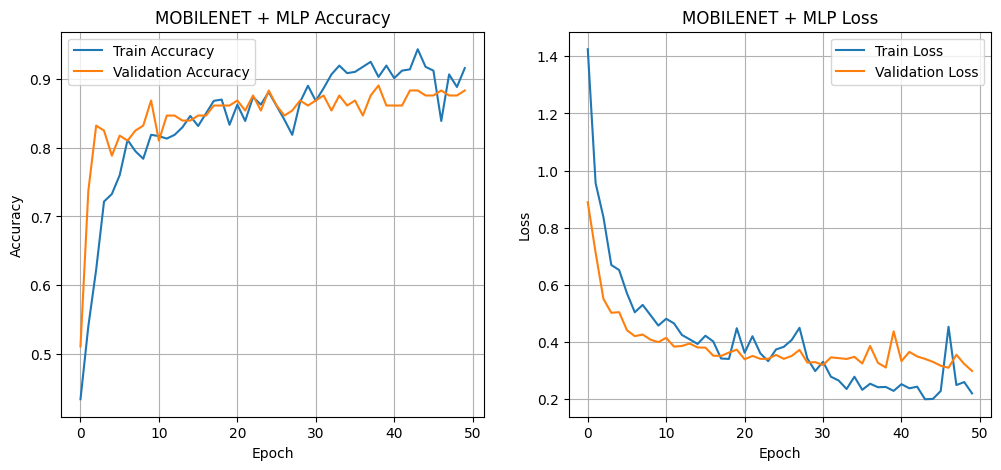

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
 MLP Accuracy: 88.32% | Precision: 0.88 | Recall: 0.88 | F1: 0.88
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/MOBILENET_MLP_confusion_matrix.png


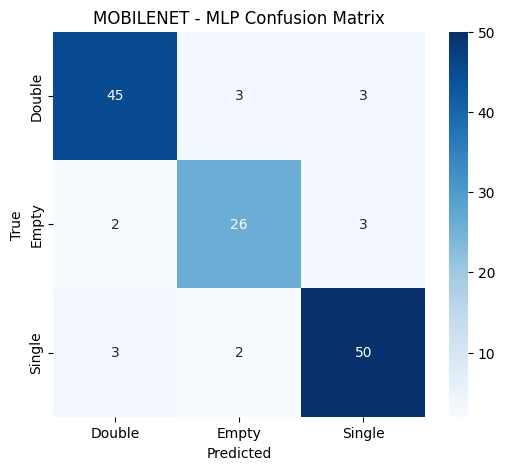


Confusion Matrix:
 [[45  3  3]
 [ 2 26  3]
 [ 3  2 50]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.90      0.88      0.89        51
       Empty       0.84      0.84      0.84        31
      Single       0.89      0.91      0.90        55

    accuracy                           0.88       137
   macro avg       0.88      0.88      0.88       137
weighted avg       0.88      0.88      0.88       137


Training RandomForest with MOBILENET features...
 RandomForest Accuracy: 86.13% | Precision: 0.86 | Recall: 0.85 | F1: 0.86
 Confusion matrix saved to /content/drive/MyDrive/confusion_matrices/MOBILENET_RandomForest_confusion_matrix.png


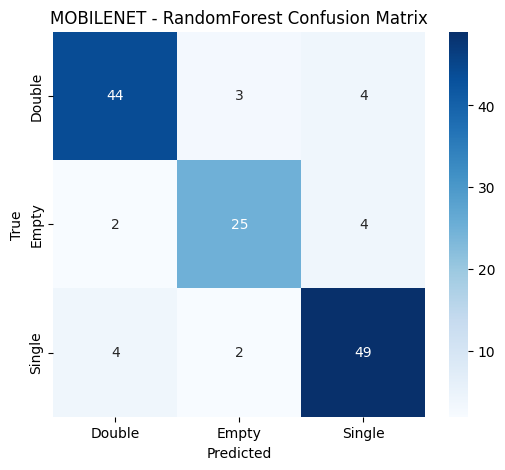


Confusion Matrix:
 [[44  3  4]
 [ 2 25  4]
 [ 4  2 49]]

Classification Report:
               precision    recall  f1-score   support

      Double       0.88      0.86      0.87        51
       Empty       0.83      0.81      0.82        31
      Single       0.86      0.89      0.88        55

    accuracy                           0.86       137
   macro avg       0.86      0.85      0.86       137
weighted avg       0.86      0.86      0.86       137


 Metrics Summary:

       Model    Classifier  Accuracy  Precision    Recall  F1-Score
0  MOBILENET           SVM  0.890511   0.897235  0.873870  0.882805
1  MOBILENET           MLP  0.883212   0.877189  0.876718  0.876900
2  MOBILENET  RandomForest  0.861314   0.857661  0.853369  0.855320

 Metrics summary CSV saved to /content/drive/MyDrive/confusion_matrices/MOBILENET_metrics_summary.csv


In [ ]:
# Install dependencies
!pip install transformers tensorflow scikit-learn opencv-python matplotlib seaborn --quiet

# Imports
from transformers import ViTFeatureExtractor, ViTModel
import torch
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV3Large
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset Path
dataset_path = '/content/drive/MyDrive/IDTAvv/100_4s_train_val_photos'

# Load Dataset
img_size = (224, 224)
X, y = [], []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            label = os.path.basename(root)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("Total images:", len(X))
print("Classes:", np.unique(y))

# Encode Labels and Split
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convert labels to categorical for Keras
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Load ViT Feature Extractor
vit_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# Feature extraction functions
def extract_vit_features(X_data):
    inputs = vit_feature_extractor(images=[cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in X_data], return_tensors="pt")
    with torch.no_grad():
        outputs = vit_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()

def extract_features(model_name, X_data):
    if model_name == 'resnet':
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        X_data = resnet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vgg16':
        base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
        X_data = vgg_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'mobilenet':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, pooling='avg')
        X_data = mobilenet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vit':
        features = extract_vit_features(X_data)
    else:
        raise ValueError("Invalid model name")
    return features

# Create Keras MLP model
def create_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Folder to save confusion matrices
save_folder = '/content/drive/MyDrive/confusion_matrices'
os.makedirs(save_folder, exist_ok=True)

# Choose model: 'resnet', 'vgg16', 'mobilenet', 'vit'
model_choice = 'mobilenet'

print(f"\nExtracting features using {model_choice.upper()}...")
train_features = extract_features(model_choice, X_train)
val_features = extract_features(model_choice, X_val)

# Classifiers
classifiers = {
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store metrics
metrics_list = []

# Loop over classifiers
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name} with {model_choice.upper()} features...")

    if clf_name == "MLP":
        keras_mlp = create_mlp(train_features.shape[1], len(label_encoder.classes_))
        history = keras_mlp.fit(train_features, y_train_cat, epochs=50, batch_size=32,
                                validation_data=(val_features, y_val_cat), verbose=1)

        # Plot training history
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_choice.upper()} + MLP Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_choice.upper()} + MLP Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.show()

        y_pred_probs = keras_mlp.predict(val_features)
        y_pred = np.argmax(y_pred_probs, axis=1)
    else:
        clf.fit(train_features, y_train)
        y_pred = clf.predict(val_features)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)

    print(f" {clf_name} Accuracy: {acc*100:.2f}% | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

    metrics_list.append({
        'Model': model_choice.upper(),
        'Classifier': clf_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_choice.upper()} - {clf_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    cm_filename = f'{model_choice.upper()}_{clf_name}_confusion_matrix.png'
    cm_path = os.path.join(save_folder, cm_filename)
    plt.savefig(cm_path, bbox_inches='tight')
    print(f" Confusion matrix saved to {cm_path}")
    plt.show()

    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Metrics summary
metrics_df = pd.DataFrame(metrics_list)
print("\n Metrics Summary:\n")
print(metrics_df)

# Save metrics summary
metrics_csv_path = os.path.join(save_folder, f'{model_choice.upper()}_metrics_summary.csv')
metrics_df.to_csv(metrics_csv_path, index=False)
print(f"\n Metrics summary CSV saved to {metrics_csv_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total images: 683
Classes: ['Double' 'Empty' 'Single']


/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(



Extracting features using RESNET...
18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step

Training MLP with RESNET features...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3260 - loss: 1.9599 - val_accuracy: 0.7153 - val_loss: 0.7674
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5454 - loss: 1.0249 - val_accuracy: 0.6715 - val_loss: 0.6936
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6436 - loss: 0.8027 - val_accuracy: 0.7591 - val_loss: 0.5832
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7321 - loss: 0.6894 - val_accuracy: 0.7956 - val_loss: 0.5875
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6742 - loss: 0.7560 - val_accuracy: 0.8102 - val_loss: 0.5504
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7347 - loss: 0.6228 - val_accuracy: 0.8394 - val_loss: 0.5260
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7643 - loss: 0.5907 - val_accuracy: 0.8394 - val_loss: 0.4597
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7797 - loss: 0.5407 - val_accuracy: 0.8394 - val_loss: 0.4635
E

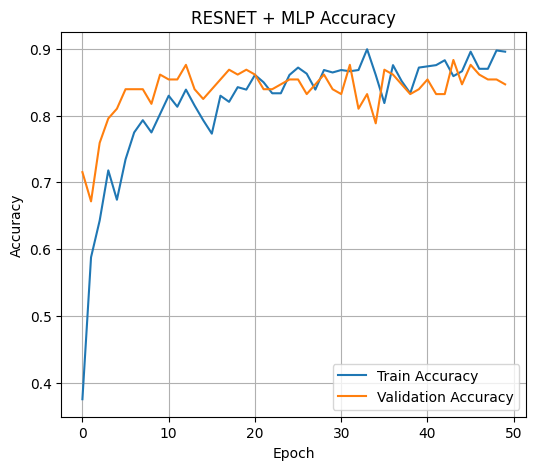

Loss plot saved to /content/drive/MyDrive/confusion_matrices/RESNET_MLP_loss.png


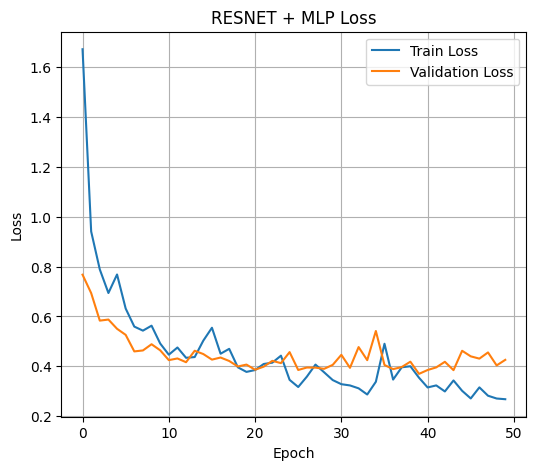

In [ ]:
# Install dependencies
!pip install transformers tensorflow scikit-learn opencv-python matplotlib seaborn --quiet

# Imports
from transformers import ViTFeatureExtractor, ViTModel
import torch
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV3Large
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset Path
dataset_path = '/content/drive/MyDrive/IDTAvv/100_4s_train_val_photos'

# Load Dataset
img_size = (224, 224)
X, y = [], []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            label = os.path.basename(root)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

print("Total images:", len(X))
print("Classes:", np.unique(y))

# Encode Labels and Split
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convert labels to categorical for Keras
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Load ViT Feature Extractor
vit_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# Feature extraction functions
def extract_vit_features(X_data):
    inputs = vit_feature_extractor(images=[cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in X_data], return_tensors="pt")
    with torch.no_grad():
        outputs = vit_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()

def extract_features(model_name, X_data):
    if model_name == 'resnet':
        base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        X_data = resnet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vgg16':
        base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
        X_data = vgg_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'mobilenet':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, pooling='avg')
        X_data = mobilenet_preprocess(X_data.copy())
        model = Model(inputs=base_model.input, outputs=base_model.output)
        features = model.predict(X_data, batch_size=32, verbose=1)
    elif model_name == 'vit':
        features = extract_vit_features(X_data)
    else:
        raise ValueError("Invalid model name")
    return features

# Create Keras MLP model
def create_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Folder to save confusion matrices
save_folder = '/content/drive/MyDrive/confusion_matrices'
os.makedirs(save_folder, exist_ok=True)

# Choose model: 'resnet', 'vgg16', 'mobilenet', 'vit'
model_choice = 'resnet'

print(f"\nExtracting features using {model_choice.upper()}...")
train_features = extract_features(model_choice, X_train)
val_features = extract_features(model_choice, X_val)

# Classifiers
classifiers = {
    #"SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500),
    #"RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store metrics
metrics_list = []

# Loop over classifiers
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name} with {model_choice.upper()} features...")

    if clf_name == "MLP":
        keras_mlp = create_mlp(train_features.shape[1], len(label_encoder.classes_))
        history = keras_mlp.fit(train_features, y_train_cat, epochs=50, batch_size=32,
                                validation_data=(val_features, y_val_cat), verbose=1)

        # Plot and save accuracy graph
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_choice.upper()} + MLP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

acc_plot_filename = f'{model_choice.upper()}_MLP_accuracy.png'
acc_plot_path = os.path.join(save_folder, acc_plot_filename)
plt.savefig(acc_plot_path, bbox_inches='tight')
print(f"Accuracy plot saved to {acc_plot_path}")
plt.show()

# Plot and save loss graph
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'{model_choice.upper()} + MLP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

loss_plot_filename = f'{model_choice.upper()}_MLP_loss.png'
loss_plot_path = os.path.join(save_folder, loss_plot_filename)
plt.savefig(loss_plot_path, bbox_inches='tight')
print(f"Loss plot saved to {loss_plot_path}")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 738.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 11.9 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Labeled:Unlabeled = 10:90 ===


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 63.6MB/s]


Epoch 1/10 Loss: 10.8428
Epoch 2/10 Loss: 6.5838
Epoch 3/10 Loss: 5.1584
Epoch 4/10 Loss: 4.4967
Epoch 5/10 Loss: 4.2557
Epoch 6/10 Loss: 3.2924
Epoch 7/10 Loss: 3.2737
Epoch 8/10 Loss: 3.6758
Epoch 9/10 Loss: 3.5552
Epoch 10/10 Loss: 3.3236
MLP Accuracy: 86.86%
Per-Class Accuracy:
Double: 84.31%
Empty: 93.55%
Single: 85.45%

=== Labeled:Unlabeled = 20:80 ===
Epoch 1/10 Loss: 10.9778
Epoch 2/10 Loss: 7.0798
Epoch 3/10 Loss: 5.9917
Epoch 4/10 Loss: 5.3947
Epoch 5/10 Loss: 4.3042
Epoch 6/10 Loss: 3.4042
Epoch 7/10 Loss: 3.7873
Epoch 8/10 Loss: 4.0625
Epoch 9/10 Loss: 4.4588
Epoch 10/10 Loss: 3.5953
MLP Accuracy: 88.32%
Per-Class Accuracy:
Double: 88.24%
Empty: 80.65%
Single: 92.73%

=== Labeled:Unlabeled = 30:70 ===
Epoch 1/10 Loss: 10.3066
Epoch 2/10 Loss: 6.9460
Epoch 3/10 Loss: 5.9459
Epoch 4/10 Loss: 4.9348
Epoch 5/10 Loss: 3.9453
Epoch 6/10 Loss: 3.3672
Epoch 7/10 Loss: 3.8959
Epoch 8/10 Loss: 2.7605
Epoch 9/10 Loss: 2.5682
Epoch 10/10 Loss: 3.0121
MLP Accuracy: 86.13%
Per-Class Acc

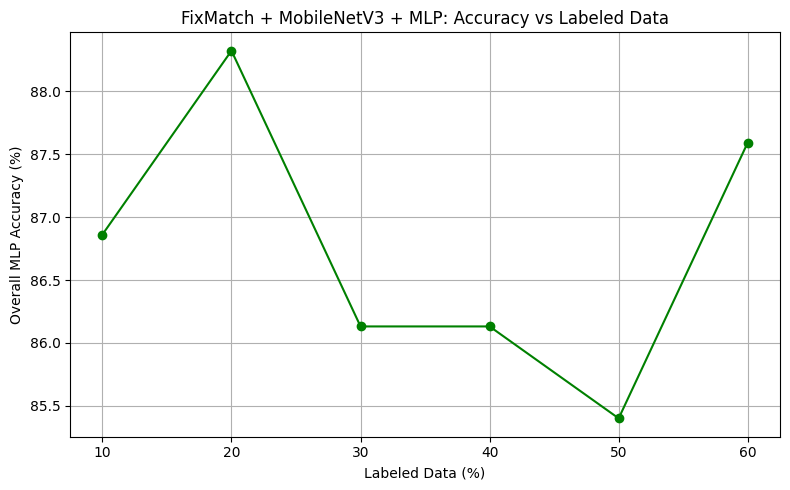

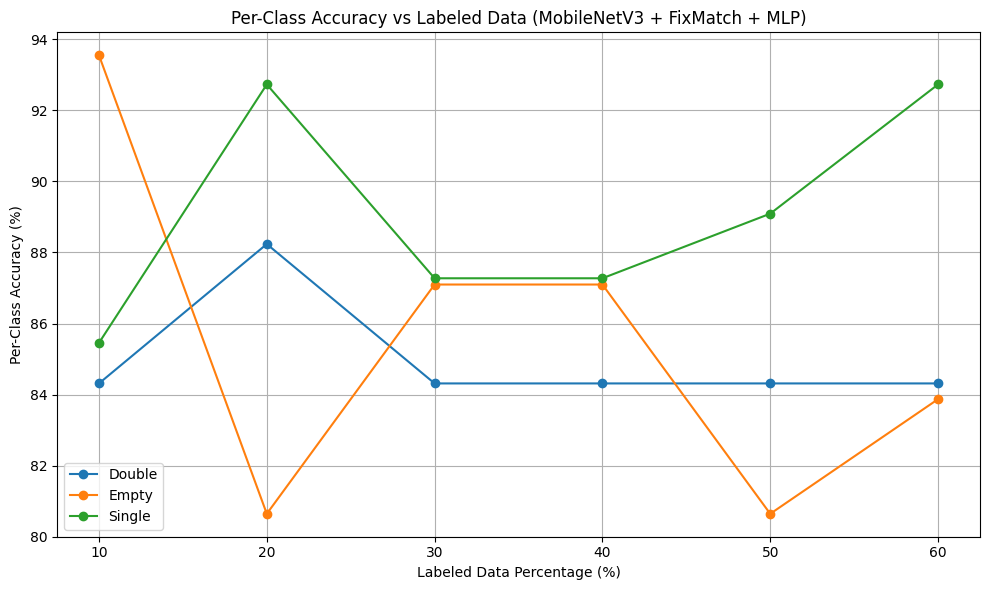

In [ ]:
# Install dependencies
!pip install torchvision scikit-learn matplotlib seaborn --quiet

import os, cv2, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# Config
DATA_PATH = '/content/drive/MyDrive/IDTAvv/100_4s_train_val_photos'
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
CONF_THRESHOLD = 0.8
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load images
def load_data(path):
    X, y = [], []
    for root, _, files in os.walk(path):
        label = os.path.basename(root)
        for f in files:
            if f.lower().endswith(('.png','.jpg','.jpeg')):
                img = cv2.imread(os.path.join(root, f))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

X, y = load_data(DATA_PATH)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

# Train/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Transforms
def get_transforms(img_size):
    weak = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    strong = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(0.4, 0.4, 0.4, 0.1),
        transforms.RandomGrayscale(p=0.2),
        transforms.ToTensor()
    ])
    eval_tf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor()
    ])
    return weak, strong, eval_tf

# Dataset
class FixMatchDataset(Dataset):
    def __init__(self, X_l, y_l, X_u, weak_tf, strong_tf):
        self.X_l, self.y_l, self.X_u = X_l, y_l, X_u
        self.weak_tf, self.strong_tf = weak_tf, strong_tf
    def __len__(self):
        return max(len(self.X_l), len(self.X_u))
    def __getitem__(self, idx):
        x_l = self.weak_tf(self.X_l[idx % len(self.X_l)])
        y_l = self.y_l[idx % len(self.X_l)]
        x_u = self.X_u[idx % len(self.X_u)]
        return x_l, y_l, self.weak_tf(x_u), self.strong_tf(x_u)

# Model (MobileNetV3)
def get_model(name, num_classes):
    if name == 'mobilenetv3':
        model = models.mobilenet_v3_large(weights='IMAGENET1K_V1')
        model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
    else:
        raise ValueError("Only mobilenetv3 supported")
    return model.to(DEVICE), IMG_SIZE

# Train FixMatch
def train_fixmatch(model, train_loader, epochs=EPOCHS, conf_thresh=CONF_THRESHOLD):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    for epoch in range(epochs):
        total_loss = 0
        for x_l, y_l, x_u_w, x_u_s in train_loader:
            x_l, y_l = x_l.to(DEVICE), y_l.to(DEVICE)
            x_u_w, x_u_s = x_u_w.to(DEVICE), x_u_s.to(DEVICE)

            logits_x = model(x_l)
            loss_x = criterion(logits_x, y_l)

            with torch.no_grad():
                probs = model(x_u_w)
                probs = torch.softmax(probs, dim=1)
                max_probs, pseudo_labels = torch.max(probs, dim=1)
                mask = max_probs.ge(conf_thresh).float()

            logits_u = model(x_u_s)
            loss_u = (criterion(logits_u, pseudo_labels) * mask).mean()

            loss = loss_x + loss_u
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} Loss: {total_loss:.4f}")
    return model

# Feature extractor
def get_feature_extractor(name):
    if name == 'mobilenetv3':
        model = models.mobilenet_v3_large(weights='IMAGENET1K_V1')
        model.classifier[3] = nn.Identity()
    else:
        raise ValueError("Only mobilenetv3 supported")
    return model.to(DEVICE)

# Feature extraction
def extract_features(model, X, eval_transform):
    model.eval()
    features = []
    with torch.no_grad():
        for img in X:
            x = eval_transform(img).unsqueeze(0).to(DEVICE)
            feat = model(x)
            features.append(feat.cpu().numpy())
    return np.vstack(features)

# Evaluation
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
overall_accuracies = []
per_class_accuracies_all = []

for ratio in split_ratios:
    print(f"\n=== Labeled:Unlabeled = {int(ratio*100)}:{int((1-ratio)*100)} ===")
    X_l, X_u, y_l, _ = train_test_split(X_trainval, y_trainval, test_size=(1 - ratio), stratify=y_trainval, random_state=42)

    model, img_size = get_model('mobilenetv3', num_classes)
    weak_tf, strong_tf, eval_tf = get_transforms(img_size)
    train_dataset = FixMatchDataset(X_l, y_l, X_u, weak_tf, strong_tf)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

    model = train_fixmatch(model, train_loader)

    feat_model = get_feature_extractor('mobilenetv3')
    feat_model.load_state_dict(model.state_dict(), strict=False)
    X_l_feat = extract_features(feat_model, X_l, eval_tf)
    X_test_feat = extract_features(feat_model, X_test, eval_tf)

    # === MLP Classifier ===
    mlp = MLPClassifier(hidden_layer_sizes=(256,), max_iter=500)
    mlp.fit(X_l_feat, y_l)
    y_pred = mlp.predict(X_test_feat)
    acc = accuracy_score(y_test, y_pred)
    overall_accuracies.append(acc * 100)
    print(f"MLP Accuracy: {acc*100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    class_acc = (cm.diagonal() / cm.sum(axis=1)) * 100
    per_class_accuracies_all.append(class_acc)

    print("Per-Class Accuracy:")
    for i, cname in enumerate(le.classes_):
        print(f"{cname}: {class_acc[i]:.2f}%")

# === Plot Overall Accuracy ===
plt.figure(figsize=(8, 5))
plt.plot([int(r*100) for r in split_ratios], overall_accuracies, marker='o', linestyle='-', color='green')
plt.xlabel("Labeled Data (%)")
plt.ylabel("Overall MLP Accuracy (%)")
plt.title("FixMatch + MobileNetV3 + MLP: Accuracy vs Labeled Data")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Per-Class Accuracy ===
per_class_accuracies_all = np.array(per_class_accuracies_all)
x_ticks = [int(r*100) for r in split_ratios]

plt.figure(figsize=(10, 6))
for i, cname in enumerate(le.classes_):
    plt.plot(x_ticks, per_class_accuracies_all[:, i], marker='o', label=f'{cname}')
plt.xlabel('Labeled Data Percentage (%)')
plt.ylabel('Per-Class Accuracy (%)')
plt.title('Per-Class Accuracy vs Labeled Data (MobileNetV3 + FixMatch + MLP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
